In [1]:
%matplotlib inline 
import json, gmaps
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re


/Users/jcapde87/Envs/udg_seminar/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
data_file = "data/tweets.json"
precise_loc = []
place = []
timestamp = []
lang = []
text = []
user_lang = []
with open(data_file,"r") as json_file:
    i = 0
    tweets = []
    for line in json_file:
        tweet = json.loads(line)
        tweets.append(tweet)
        if tweet["place"] is not None:
            place.append(tweet["place"]["name"])
        else:
            place.append(float("NaN"))
        if tweet["geo"] is not None:
            precise_loc.append(tweet["geo"]["coordinates"])
        else:
            precise_loc.append(float("NaN"))
        timestamp.append(datetime.strptime(tweet["created_at"], '%a %b %d %H:%M:%S +0000 %Y'))
        lang.append(tweet["lang"])
        user_lang.append(tweet["user"]["lang"])
        text.append(tweet["text"])

In [4]:
tweet

{u'contributors': None,
 u'coordinates': None,
 u'created_at': u'Wed Nov 23 12:45:26 +0000 2016',
 u'display_text_range': [21, 95],
 u'entities': {u'hashtags': [],
  u'symbols': [],
  u'urls': [],
  u'user_mentions': [{u'id': 21777233,
    u'id_str': u'21777233',
    u'indices': [0, 9],
    u'name': u'Inga Au\xf0bj\xf6rg',
    u'screen_name': u'ingaausa'},
   {u'id': 14527437,
    u'id_str': u'14527437',
    u'indices': [10, 20],
    u'name': u'Sverrir',
    u'screen_name': u'sverrirbo'}]},
 u'favorite_count': 0,
 u'favorited': False,
 u'filter_level': u'low',
 u'geo': None,
 u'id': 801406301976797184,
 u'id_str': u'801406301976797184',
 u'in_reply_to_screen_name': u'ingaausa',
 u'in_reply_to_status_id': 801397057474985985,
 u'in_reply_to_status_id_str': u'801397057474985985',
 u'in_reply_to_user_id': 21777233,
 u'in_reply_to_user_id_str': u'21777233',
 u'is_quote_status': False,
 u'lang': u'is',
 u'place': {u'attributes': {},
  u'bounding_box': {u'coordinates': [[[2.260015, 41.460653]

In [5]:
tweet_df = pd.DataFrame(columns=["exact_location", "place", "counts", "lang"])
tweet_df.exact_location = precise_loc
tweet_df.place = place
tweet_df.counts = 1
tweet_df.ix[1:19]
tweet_df.lang = lang
tweet_df.index = timestamp


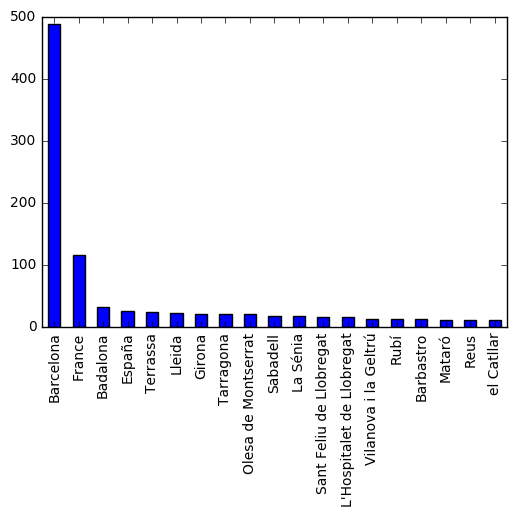

In [6]:
tweet_df.place.value_counts()[0:19].plot(kind='bar')

In [7]:
with open("conf/maps.json", "r") as config_file:
    conf = json.load(config_file)

In [8]:
gmaps.configure(api_key=conf[u'api_key'])

m = gmaps.Map()
#locs = tweet_df.exact_location[~pd.isnull(tweet_df.exact_location).values].values
locs = tweet_df.exact_location[~pd.isnull(tweet_df.exact_location).values].values[1:1000]
tweets_layer = gmaps.symbol_layer(locs, fill_color="red", stroke_color="red", scale=2)
m.add_layer(tweets_layer)
m

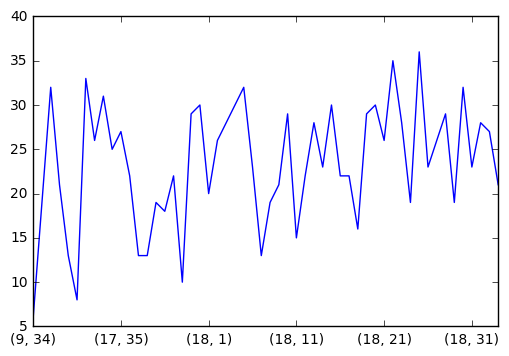

In [9]:
tweet_df.groupby([tweet_df.index.hour, tweet_df.index.minute]).count()["counts"].plot()

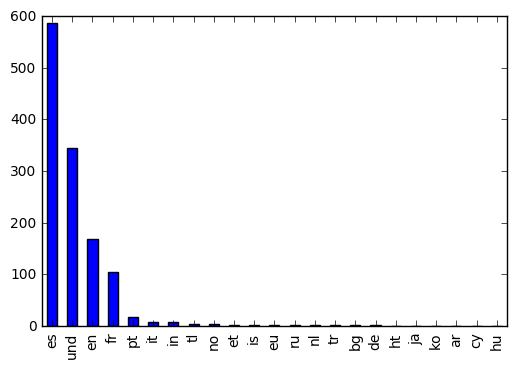

In [10]:
tweet_df.lang.value_counts().plot(kind='bar')

In [11]:
for i, ibool in enumerate(tweet_df.lang.values=="und"): 
    if ibool:
        print tweet_df.lang.values[i] + ": "+user_lang[i] + " => " + text[i]


und: ca => @DjRepubliCAT ECSSSS. Els amos d les plantacions tb anaven uns quan cops a revisar el q feien els esclaus a les seves terres. SOM 1 COLÒNIA!
und: es => @FansTSanchisG @manoli2011garc1
und: es => La @cupnacional porta el debat dels pressupostos del @govern de @JuntsPelSi dels despatxos cap al carrer https://t.co/EgOYL5pemZ
und: es => Si us interessa, que vinguem a visitar el vostre poble o ciutat, amb alguna de les nostres figures,...
und: es => La @cupnacional porta el debat dels pressupostos del @govern de @JuntsPelSi dels despatxos cap al carrer https://t.co/ZikaVZ116K
und: ca => Deu formar part de la nova estratègia de diàleg: el Tribunal Suprem confirma suspensió de tres anys a Santiago Vidal https://t.co/oOOONKK1lg
und: zh-Hans => #fotografías #Disneyland #Disney https://t.co/sUao5XbZBg
und: es => El @PPCatalunya no pot tenir millor portaveu al @parlament_cat que @alejandroTGN Enhorabona! https://t.co/OF8pSB7kgw
und: es => només ens heu d'enviar, un correu a arreplegage

In [12]:
stopwords.words('english')

toIgnore_expr = [r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # url
                 r'&[a-z]+;' # html entities
                 ]
all_toIgnore = '|'.join(toIgnore_expr)

def remove_waste(text):
    return re.sub(all_toIgnore," ",text)

def tokenize(sentence, lang):
    stopw = stopwords.words('spanish') + [u'si', u'barcelona'] + stopwords.words('english')  
    return [word for word in re.findall(r"[#|@|A-Z|a-z]\w*", remove_waste(sentence))
                if len(word)>1 and word[0]!="#" and word[0]!="@" and word.lower() not in stopw]


In [13]:
docs = [tokenize(txt, lang[i]) for i, txt in enumerate(text) if lang[i]=="en" or lang[i]=="es"]

In [14]:
for doc in docs[1:100]:
    print " ".join(doc)

Le FPV rend addict
CREEIS MIERCOLES VIVA
Gin brez trata arrancarlo
buen baiteo linea hahahaha gracias ps4 poner tarda ahora min easy cancel
defiendo catalanes deban saberlo
raquel bollo falsa victima GUIONIZADA

friends better Parc del rum
Ma ana entrevista wi
raquel bollo falsa victima GUIONIZADA
Creo sab is pueden doler ciertas palabras
rata rastrera van seguir jodiendonos
buen consejo
uso Pueden ustedes decir mismo catal
todas entradas formen parte pack VIP acceso ser entrada principal Barclaycard Center
amazing Lovely weather weekend amazing tapas food
Adivinad qui va morir agujetas ma ana
Hoy cat concedido premio pyme mejor trabajado implantaci RSE
love hope know Darling love worth weight gold
amazing Lovely weather weekend amazing tapas food
hola puedes abrirme MD porfavor
Hola aqu llueve Granada tampoco grande
Uy uy
sorprende pueda seleccionar Guerreiro Juanfran Carrasco Allen Marcelo Alaba Casemiro
looking apartment Boston
Hijos ricos franquistas tambi ICV Verdad hablamos sino 

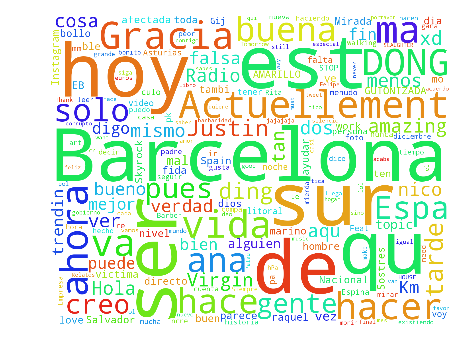

In [15]:
wordcloud = WordCloud(background_color='white', width=1800, height=1400).generate(" ".join([word for doc in docs  for word in doc]))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()